In [77]:
def Set_Num_cycles(G):
    #number of cycles of fixed length contains the edge (0,1)

    V = G.vertices()
    E = G.edges(labels=None)
    T=[]
    for (x,y) in E:
        T.append(G.all_paths(x,y))

    S = [[] for i in range (len(V)-2)]

    for k in range (0, len(V)-2):
        Sum = 0
        for j in range(len(T[0])):
            if len(T[0][j]) == k+3:
                Sum = Sum + 1
        S[k].append((k+3,Sum))
    return S

def Set_Num_cycles2(G, which_edge = 0):
    #number of cycles of fixed length contains the edge (0,1)

    V = G.vertices()
    E = G.edges(labels=None)
    T=[]
    x,y = E[which_edge]
    T = G.all_paths(x,y)

    S = [0 for _ in range (len(V)+1)]

    for P in T:
        l = len(P)
        if l > 2:
            S[l] += 1
        
    return S

def Prb(G):
    #Sum over cycles contains edges 12 
    Sum = 0
    for i in range (len (Set_Num_cycles(G))):
        if Set_Num_cycles(G)[i][0][1] != 0:
            s = (1/2**(Set_Num_cycles(G)[i][0][0]))*Set_Num_cycles(G)[i][0][1]
            Sum = Sum + s
    return Sum

def Prb1(G):
    #Sum over cycles contains edges 12 
    Sum = 0
    for k,n in Set_Num_cycles(G):
        Sum += (1/2**k)*n

    return Sum

def Prb2(G, which_edge=0):
    #Sum over cycles contains edges 12 
    Sum = 0
    for k,n in zip(range(G.num_verts()+1), Set_Num_cycles2(G, which_edge)):
        Sum += (1/2**k)*n

    return Sum


def Prb3(G, which_edge=0):
    #Sum over cycles contains edges 12 
    
    return [(1/2**k)*n for k,n in zip(range(G.num_verts()+1), Set_Num_cycles2(G, which_edge))]
        

In [20]:
L = [0,1,2]
M = [10,11,12]
list(zip(L,M))

[(0, 10), (1, 11), (2, 12)]

In [79]:
G = graphs.PetersenGraph()
list(zip(range(11), Set_Num_cycles2(G)))


[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 4),
 (6, 4),
 (7, 0),
 (8, 8),
 (9, 12),
 (10, 0)]

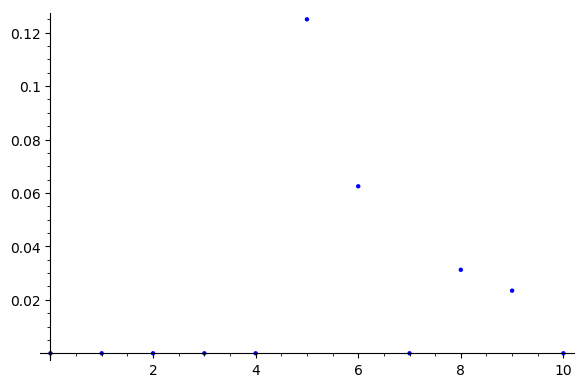

In [81]:
list_plot(Prb3(G))

In [15]:
G = graphs.PetersenGraph()
Prb(G), Set_Num_cycles(G)

(31/128,
 [[(3, 0)],
  [(4, 0)],
  [(5, 4)],
  [(6, 4)],
  [(7, 0)],
  [(8, 8)],
  [(9, 12)],
  [(10, 0)]])

In [34]:
G = graphs.PetersenGraph()
Prb2(G), Prb2(G,which_edge=5)

(31/128, 31/128)

In [36]:
H = graphs.BlanusaFirstSnarkGraph()
Prb2(H), 

(703/4096, 703/4096)

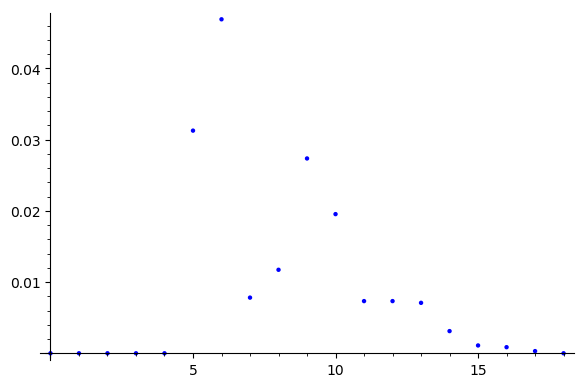

In [82]:
list_plot(Prb3(H))

In [44]:
for i in range(H.num_edges()):
    print (i, Prb2(H, which_edge = i).n())

0 0.171630859375000
1 0.171630859375000
2 0.149261474609375
3 0.171630859375000
4 0.178100585937500
5 0.171630859375000
6 0.149261474609375
7 0.178100585937500
8 0.171630859375000
9 0.178100585937500
10 0.192932128906250
11 0.171630859375000
12 0.171630859375000
13 0.149261474609375
14 0.171630859375000
15 0.178100585937500
16 0.149261474609375
17 0.179122924804688
18 0.179122924804688
19 0.179122924804688
20 0.180389404296875
21 0.179122924804688
22 0.180389404296875
23 0.179122924804688
24 0.179122924804688
25 0.179122924804688
26 0.179122924804688


In [76]:
Set_Num_cycles2(H)

[0, 0, 0, 0, 0, 1, 3, 1, 3, 14, 20, 15, 30, 58, 51, 36, 56, 40, 0]

In [40]:
H.edges()

[(0, 1, None), (0, 5, None), (0, 16, None), (1, 2, None), (1, 17, None), (2, 3, None), (2, 14, None), (3, 4, None), (3, 8, None), (4, 5, None), (4, 17, None), (5, 6, None), (6, 7, None), (6, 11, None), (7, 8, None), (7, 17, None), (8, 9, None), (9, 10, None), (9, 13, None), (10, 11, None), (10, 15, None), (11, 12, None), (12, 13, None), (12, 16, None), (13, 14, None), (14, 15, None), (15, 16, None)]

In [26]:
F = graphs.BlanusaSecondSnarkGraph()
Prb2(F).n()


0.177566528320312

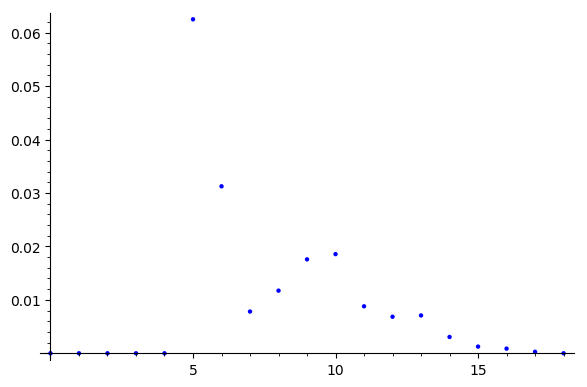

In [83]:
list_plot(Prb3(F))

In [25]:
D = graphs.FlowerSnark()
Prb2(D).n()

0.169048309326172

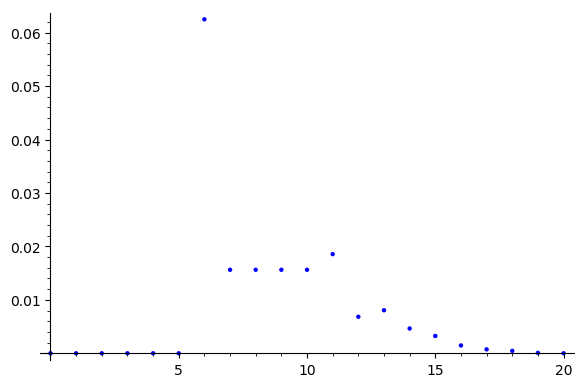

In [84]:
list_plot(Prb3(D))

In [29]:
Prb2(graphs.CompleteGraph(4)).n()

0.375000000000000

In [51]:
Prb2(graphs.HeawoodGraph()).n()

0.204101562500000

In [87]:
RC = graphs.RandomRegular(3, 30)
Prb2(RC).n()

0.137881180271506

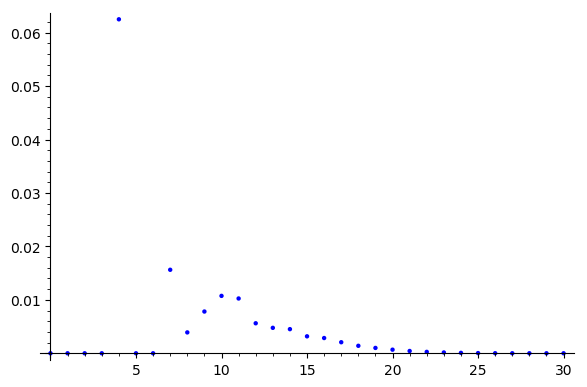

In [88]:
list_plot(Prb3(RC))

In [72]:
graphs.FlowerSnark?